# **Microsoft Stock Price Prediction with Machine Learning**

1.   List item
2.   List item



Machine learning proves immensely helpful in many industries in automating tasks that earlier required human labor one such application of ML is predicting whether a particular trade will be profitable or not.We will implement Microsoft Stock Price Prediction with a Machine Learning technique. We will use TensorFlow, an Open-Source Python Machine Learning Framework developed by Google. TensorFlow makes it easy to implement Time Series forecasting data. Since Stock Price Prediction is one of the Time Series Forecasting problems, we will build an end-to-end Microsoft Stock Price Prediction with a Machine learning technique.





##Importing Libraries and Dataset

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy – Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn – This library is used to draw visualizations.

Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

Tensorflow – TensorFlow is a Machine Learning Framework developed by Google Developers to make the implementation of machine learning algorithms a cakewalk.

In [37]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

Now let’s load the dataset which contains Microsoft's(MSFT) NasdaqGS - NasdaqGs daily stock price information between 2015 and 2022. All data is collected from Yahoo Finance and they are in USD.

Note: Because stock markets are closed in weekends, data is not covering the weekends.

In [38]:
microsoft = pd.read_csv('microsoft_stocks.csv')
print(microsoft.head())

    Index      Date       High        Low       Open      Close    Volume  Name
0  390198  12/01/15  47.540001  46.360001  47.419998  46.599998  23651900  MSFT
1  390199  13/01/15  47.910000  46.060001  46.970001  46.360001  35270600  MSFT
2  390200  14/01/15  46.240002  45.619999  45.959999  45.959999  29719600  MSFT
3  390201  15/01/15  46.380001  45.410000  46.220001  45.480000  32750800  MSFT
4  390202  16/01/15  46.279999  45.169998  45.310001  46.240002  35695300  MSFT


In [39]:
microsoft.shape

(1925, 8)

In [40]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1925 non-null   int64  
 1   Date    1925 non-null   object 
 2   High    1925 non-null   float64
 3   Low     1925 non-null   float64
 4   Open    1925 non-null   float64
 5   Close   1925 non-null   float64
 6   Volume  1925 non-null   int64  
 7   Name    1925 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 120.4+ KB


In [41]:
microsoft.describe()

,Index,High,Low,Open,Close,Volume
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03
mean,391160.000000,140.301455,137.482982,138.934888,138.967096,3.009687e+07
std,555.843953,89.000722,87.030367,88.066413,88.062951,1.397862e+07
min,390198.000000,40.740002,39.720001,40.340000,40.290001,7.425600e+06
25%,390679.000000,61.410000,60.810001,61.009998,61.119999,2.150010e+07
50%,391160.000000,108.739998,106.290001,107.860001,107.639999,2.669610e+07
75%,391641.000000,215.000000,210.360001,213.100006,212.830002,3.426400e+07
max,392122.000000,349.670013,342.200012,344.619995,343.109985,1.691640e+08


**Exploratory Data Analysis**

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.



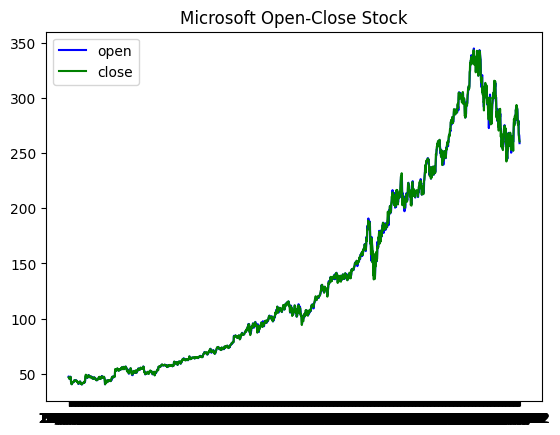

In [42]:
plt.plot(microsoft['Date'],
         microsoft['Open'],
         color="blue",
         label="open")
plt.plot(microsoft['Date'],
         microsoft['Close'],
         color="green",
         label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()




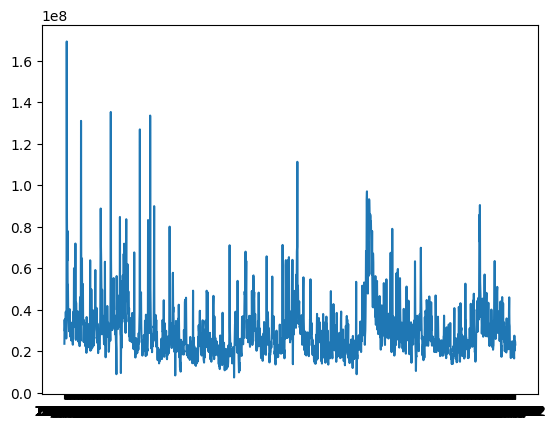

In [43]:
plt.plot(microsoft['Date'],
         microsoft['Volume'])
plt.show()

<ipython-input-44-58683222c04c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  microsoft['Date'] = pd.to_datetime(microsoft['Date'])


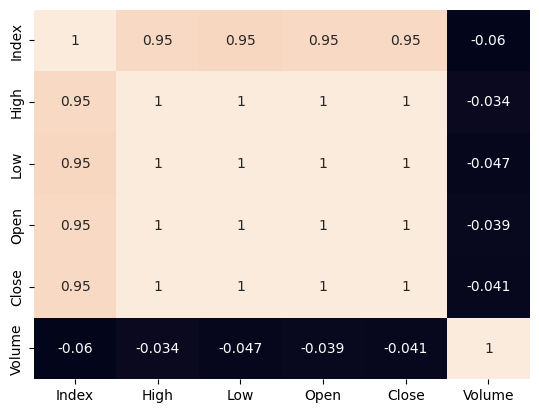

In [44]:
# Convert 'Date' column to datetime objects
microsoft['Date'] = pd.to_datetime(microsoft['Date'])

# Extract numerical features for correlation
numerical_microsoft = microsoft.select_dtypes(include=['number'])

sns.heatmap(numerical_microsoft.corr(),
            annot=True,
            cbar=False)
plt.show()

Now, let’s just plot the Close prices of Microsoft Stock for the time period of 2015 to 2022 which is for a span of 7 years.



Text(0.5, 1.0, 'Microsoft Stock Price')

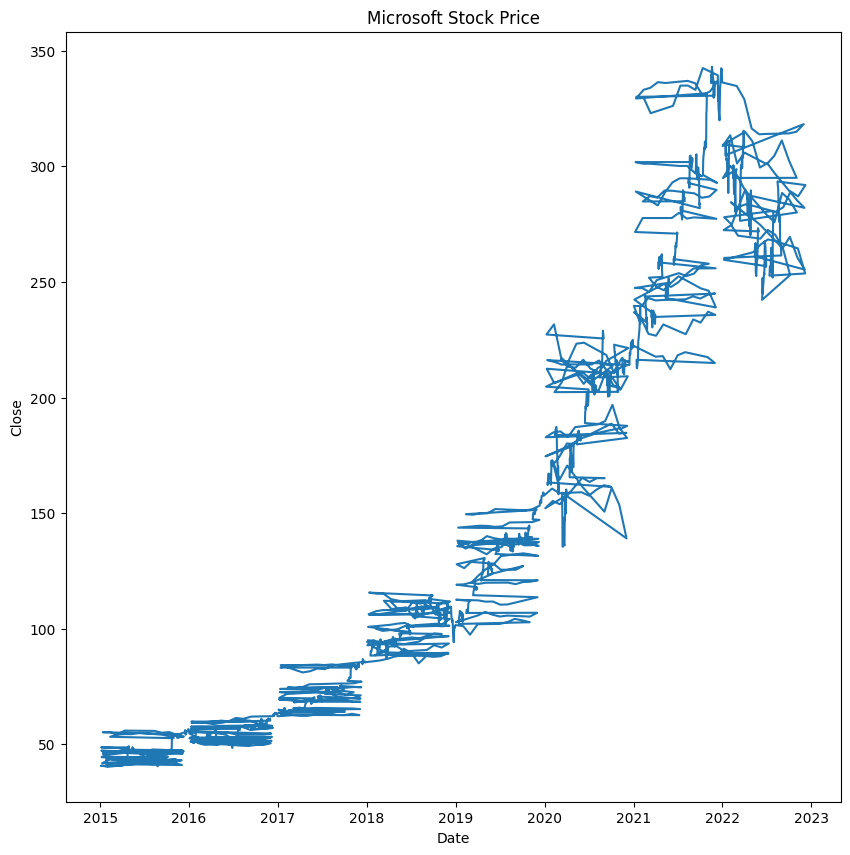

In [45]:
microsoft['Date'] = pd.to_datetime(microsoft['Date'])
prediction = microsoft.loc[(microsoft['Date']
                            > datetime(2015, 1, 1))
                            & (microsoft['Date']
                            < datetime(2022, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['Date'], microsoft['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Price')

In [46]:
# prepare the training set samples
msft_close = microsoft.filter(['Close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * .95))

#scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

#considering 60 as the batch size,
#create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train),\
                   np.array(y_train)
X_train = np.reshape(x_train,
                     (x_train.shape[0],
                      x_train.shape[1], 1))




## Build the Model

To tackle the Time Series or Stock Price Prediction problem statement, we build a Recurrent Neural Network model, that comes in very handy to memorize the previous state using cell state and memory state. Since RNNs are hard to train and prune to Vanishing Gradient, we use LSTM which is the RNN gated cell, LSTM reduces the problem of Vanishing gradients.

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


## Compile and Fit


While compiling a model we provide these three essential parameters:

optimizer – This is the method that helps to optimize the cost function by using gradient descent.

loss – The loss function by which we monitor whether the model is improving with training or not.

metrics – This helps to evaluate the model by predicting the training and the validation data.


In [48]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train,
                    epochs=20)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.2863 - root_mean_squared_error: 0.4371
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0994 - root_mean_squared_error: 0.1420
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0844 - root_mean_squared_error: 0.1216
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0874 - root_mean_squared_error: 0.1236
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0840 - root_mean_squared_error: 0.1187
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0765 - root_mean_squared_error: 0.1071
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0752 - root_mean_squared_error: 0.1046
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0753 - root_mean_squared_error: 0.1062
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0857 - root_mean_squared_error: 0.1243
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0814 - root_mean_squared_error: 0.1196

We got 0.0693 mean absolute error, which is close to the perfect error score.

##Model Evaluation

Now as we have our model ready let’s evaluate its performance on the validation data using different metrics. For this purpose, we will first predict the class for the validation data using this model and then compare the output with the true labels.

In [49]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
  x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 


Now let’s plot the known data and the predicted price trends in the Microsoft Stock prices and see whether they align with the previous trends or totally different from them.



<ipython-input-50-85fa3f60a78d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


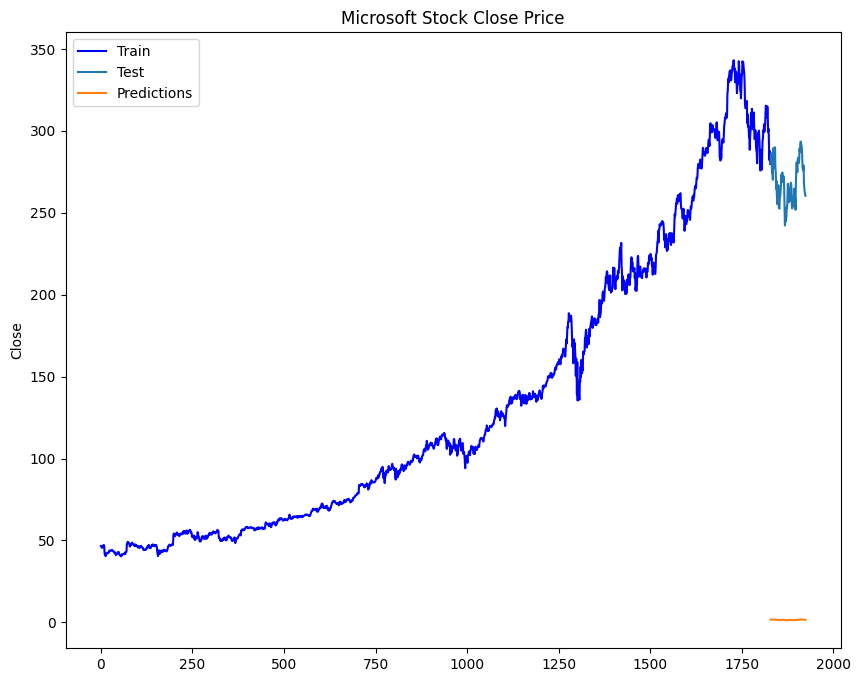

In [50]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10,8))
plt.plot(train['Close'], c="b")
plt.plot(test[['Close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel('Close')
plt.legend(['Train', 'Test', 'Predictions'])